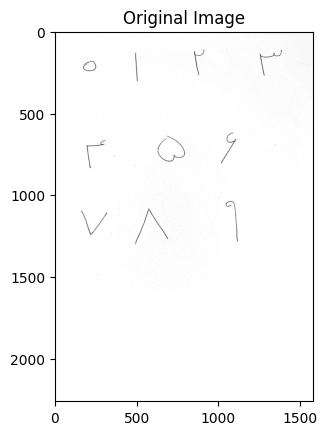

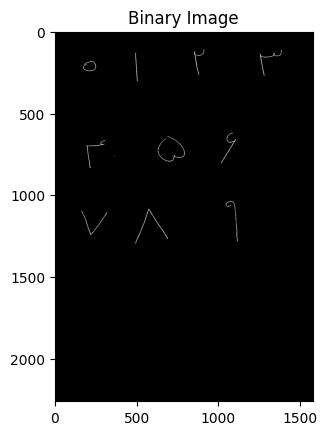

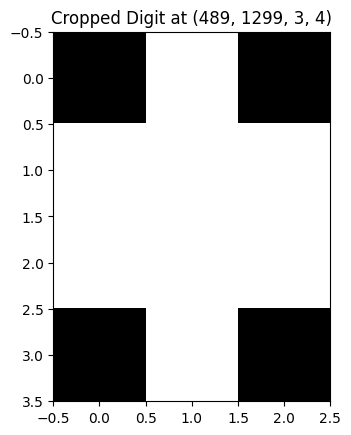

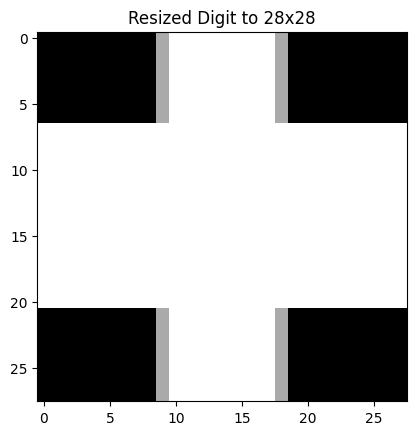

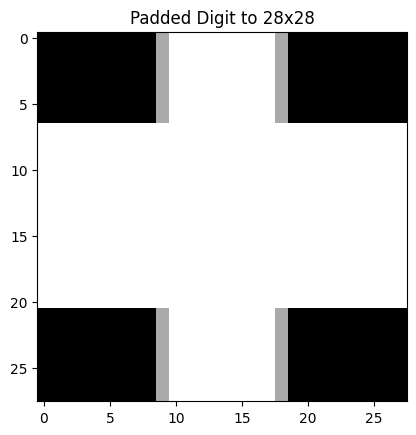

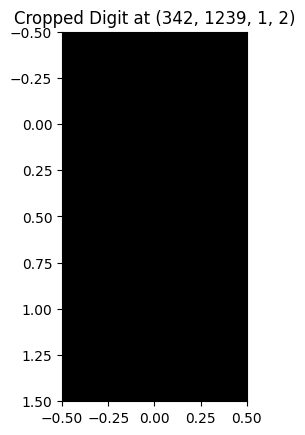

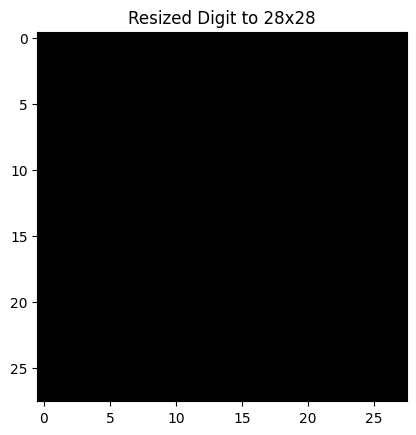

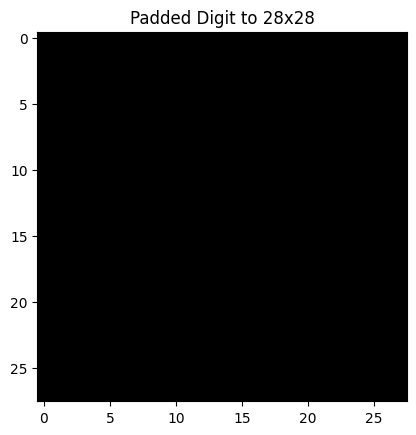

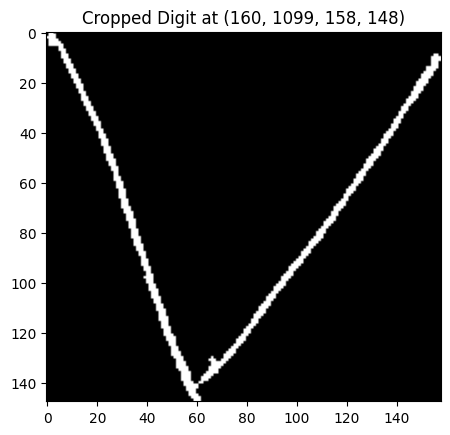

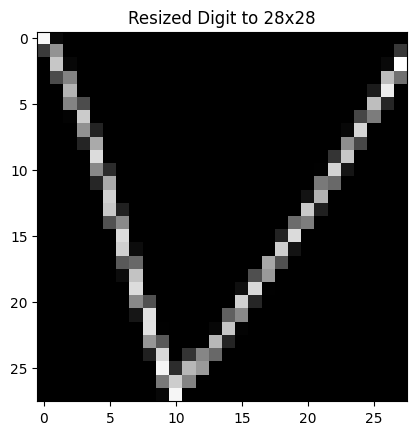

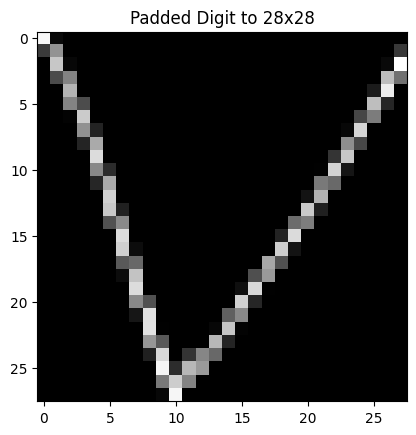

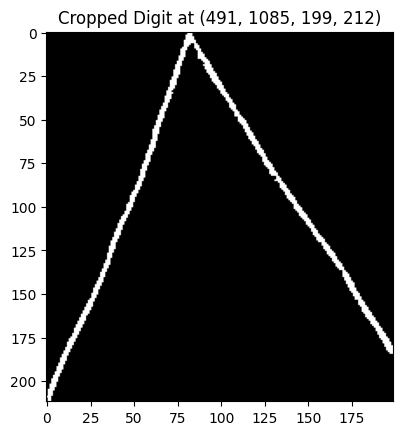

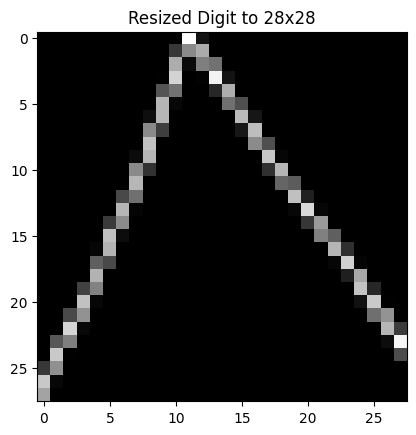

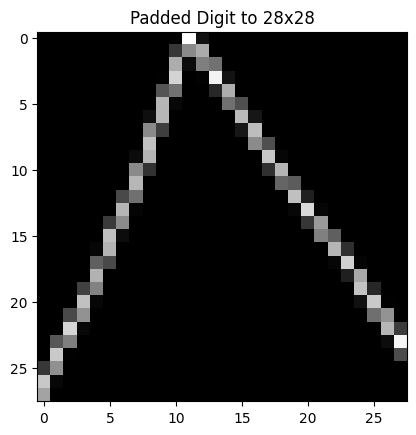

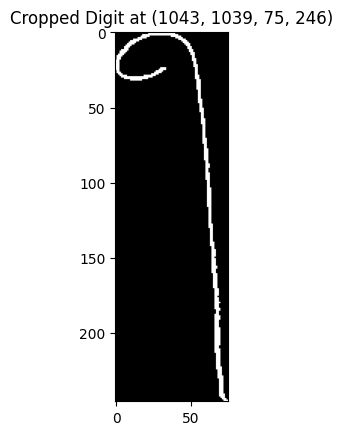

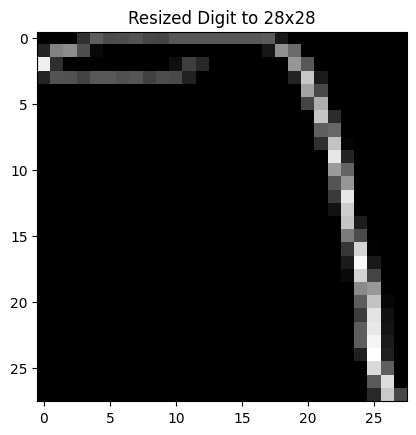

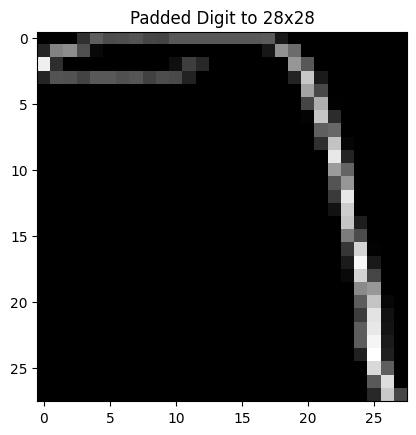

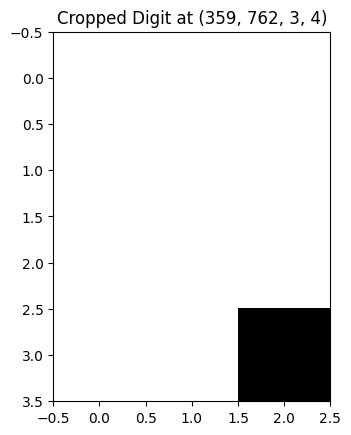

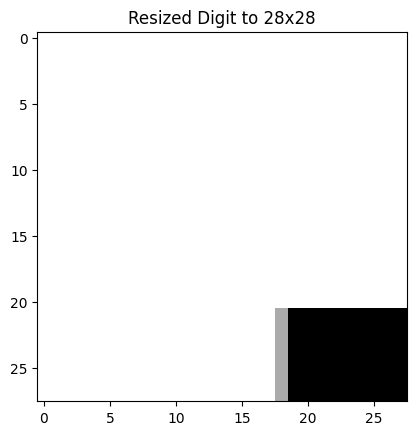

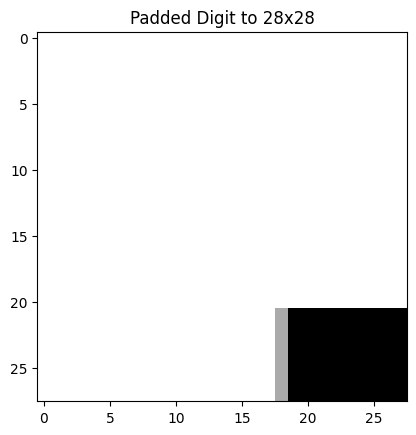

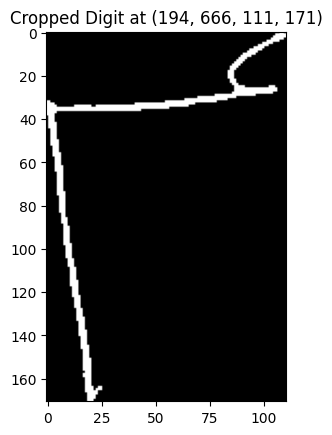

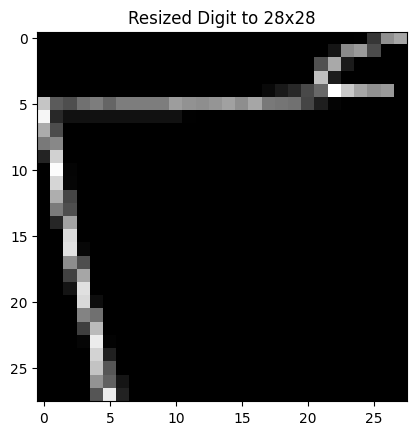

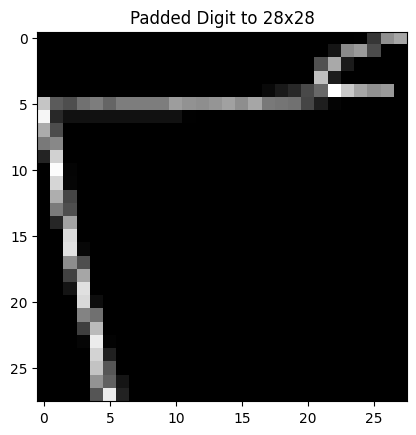

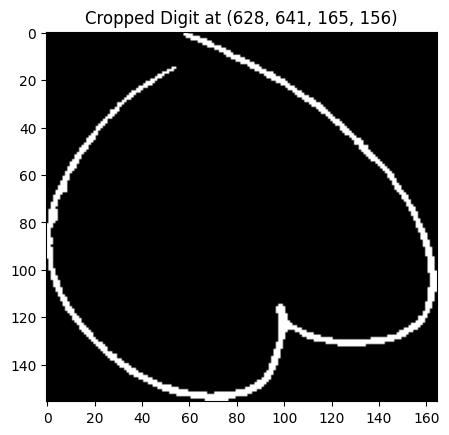

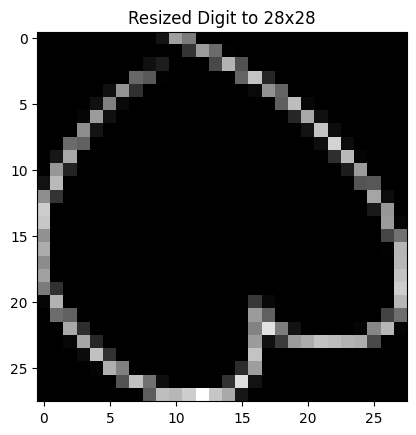

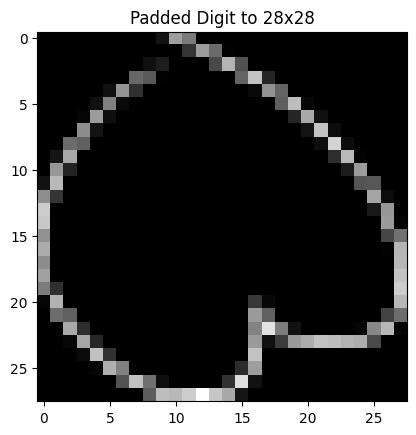

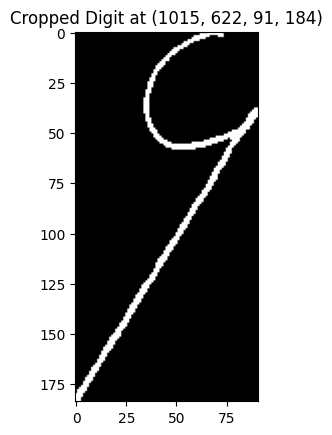

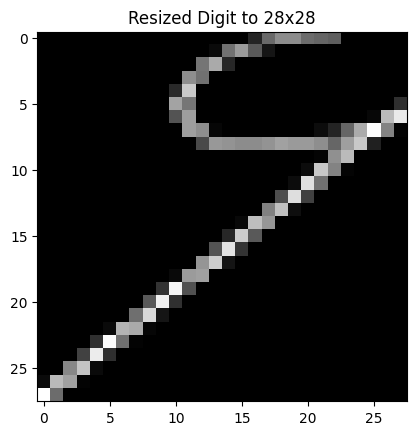

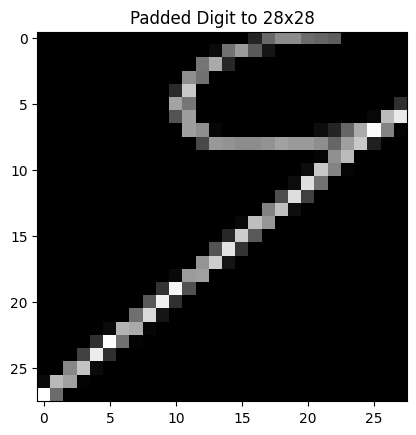

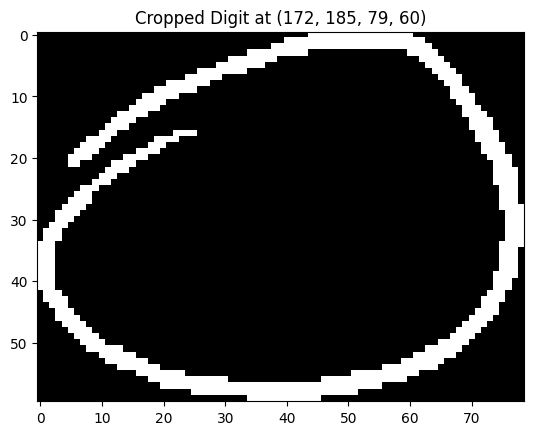

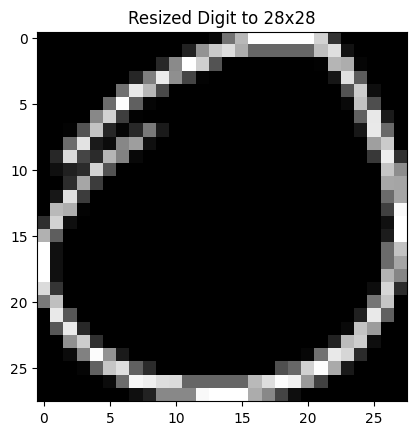

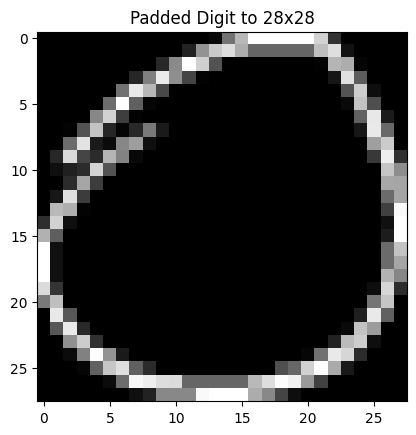

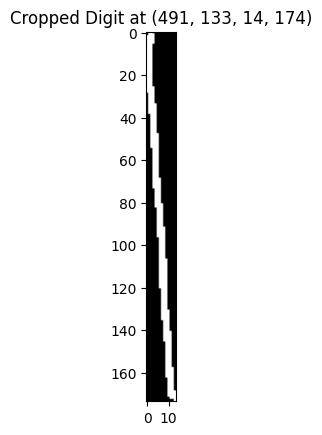

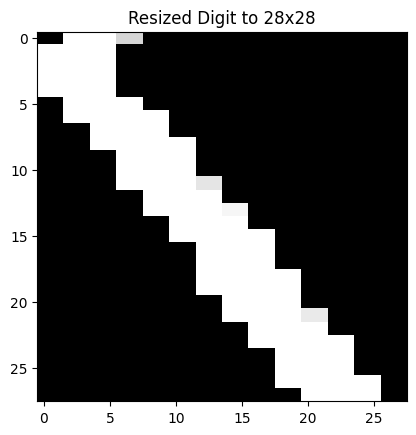

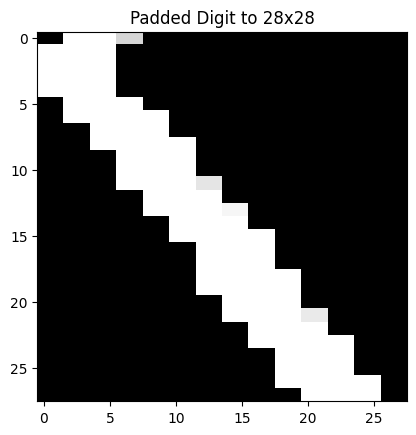

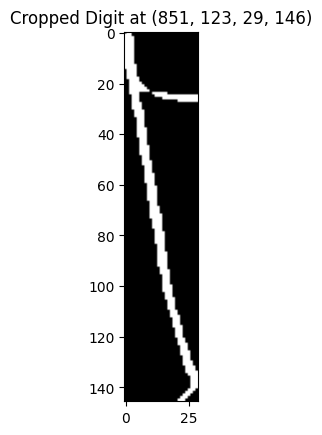

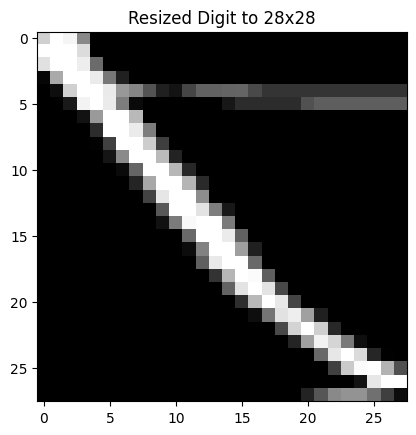

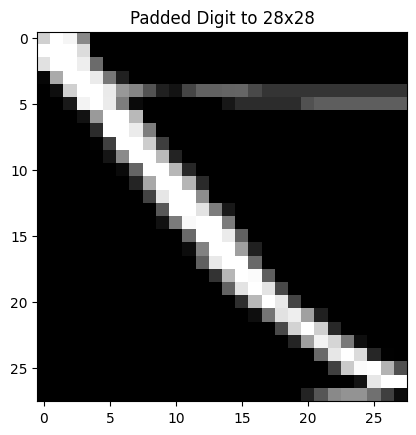

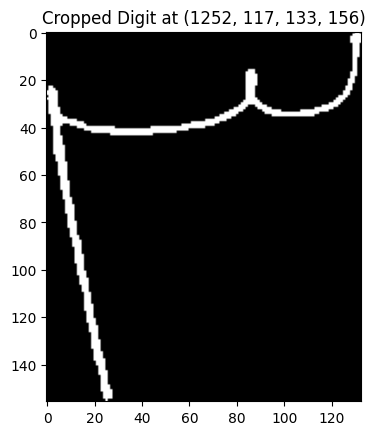

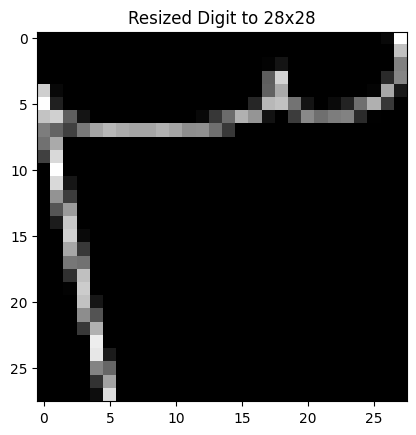

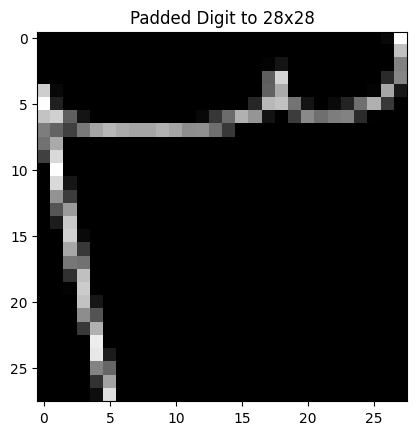

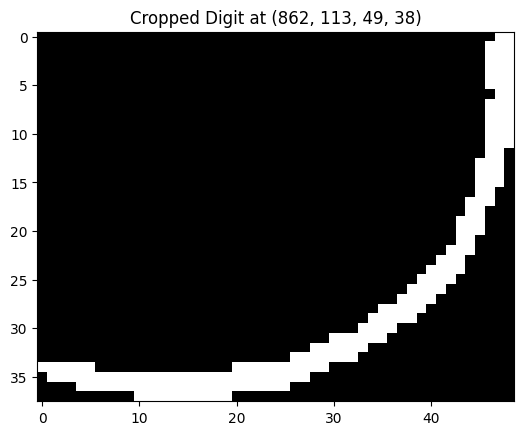

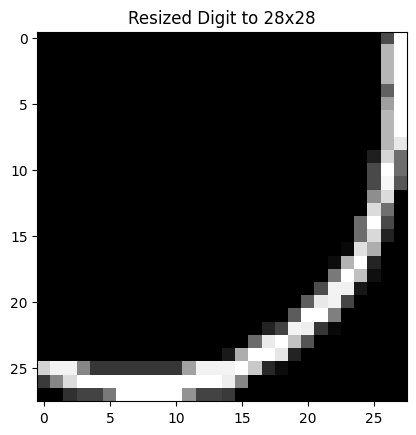

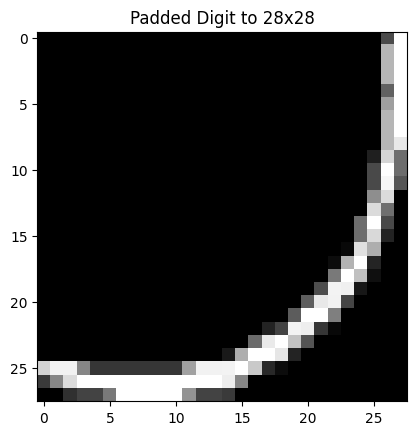

Final processed array shape: (14, 784)
[[162   6   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...  40 198  69]
 [  0   0   0 ...   0   0   0]]
CSV file saved at: handwritten_digits.csv


In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

image_path = 'IMG_6872.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# تبدیل تصویر به سیاه و سفید
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# لیست برای ذخیره اعداد پردازش‌شده
processed_digits = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # برش عدد
    digit = binary_image[y:y+h, x:x+w]
    plt.imshow(digit, cmap='gray')
    plt.title(f"Cropped Digit at ({x}, {y}, {w}, {h})")
    plt.show()
    
    resized_digit = cv2.resize(digit, (28, 28), interpolation=cv2.INTER_AREA)
    plt.imshow(resized_digit, cmap='gray')
    plt.title("Resized Digit to 28x28")
    plt.show()
    
    padded_digit = cv2.copyMakeBorder(resized_digit, 
                                      top=(28-resized_digit.shape[0])//2,
                                      bottom=(28-resized_digit.shape[0])//2,
                                      left=(28-resized_digit.shape[1])//2,
                                      right=(28-resized_digit.shape[1])//2,
                                      borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])
    plt.imshow(padded_digit, cmap='gray')
    plt.title("Padded Digit to 28x28")
    plt.show()
    
    flat_digit = padded_digit.flatten()
    
    processed_digits.append(flat_digit)

processed_digits_array = np.array(processed_digits)

sorted_indices = np.argsort([cv2.boundingRect(contour)[0] for contour in contours])
sorted_digits_array = processed_digits_array[sorted_indices]

print("Final processed array shape:", sorted_digits_array.shape)
print(sorted_digits_array)

df = pd.DataFrame(sorted_digits_array)
csv_path = 'handwritten_digits.csv'
df.to_csv(csv_path, index=False, header=False)
print(f"CSV file saved at: {csv_path}")
